## **Segunda Parte - Proyecto Final**
En esta segunda entraga para el proyecto final se realizara un EDA en un conjunto de datos que incluye canciones de varios artistas a nivel mundial. Para cada canción, el conjunto de datos recopila varias estadísticas de la versión de la canción en Spotify, incluyendo el número de reproducciones (streams), así como el número de vistas del video musical oficial en YouTube (Views).
El conjunto de datos fue actualizado el 7 de febrero de 2023 por ultima vez y esta compuesto por 20718 canciones.

### **Descripción de los Datos**
El conjunto de datos incluye 26 variables para cada una de las canciones, recopiladas de la plataforma Spotify. Estas variables se describen brevemente a continuación:

- Track: Nombre de la canción, tal como aparece en la plataforma Spotify.
- Artist: Nombre del artista.
- Url_spotify: URL de la canción en Spotify.
- Album: Álbum en el que se encuentra la canción en Spotify.
- Album_type: Indica si la canción se lanzó en Spotify como un sencillo o está contenida en un álbum.
- Uri: Enlace de Spotify utilizado para encontrar la canción a través de la API.
- Danceability: Describe qué tan adecuada es una pista para bailar basándose en una combinación de elementos musicales, incluyendo el tempo, la estabilidad del ritmo, la fuerza del beat y la regularidad general. Un valor de 0.0 es menos bailable y 1.0 es más bailable.
- Energy: Es una medida de 0.0 a 1.0 y representa una medida perceptual de intensidad y actividad. Por lo general, las pistas enérgicas se sienten rápidas, fuertes y ruidosas.
- Key: La tonalidad en la que está la pista. Los enteros se asignan a notas utilizando la notación estándar de Clase de Tono. 
- Loudness: La sonoridad general de una pista en decibelios (dB).
- Speechiness: Detecta la presencia de palabras habladas en una pista.
- Acousticness: Medida de confianza de si la pista es acústica. 1.0 representa alta confianza en que la pista es acústica.
- Instrumentalness: Predice si una pista no contiene voces.
- Liveness: Detecta la presencia de una audiencia en la grabación.
- Valence: Medida que describe la positividad musical transmitida por una pista.
- Tempo: El tempo estimado total de una pista en latidos por minuto (BPM).
- Duration_ms: Duración de la pista en milisegundos.
- Stream: Número de reproducciones de la canción en Spotify.
- Url_youtube: URL del video relacionado con la canción en YouTube, si lo tiene.
- Title: Título del videoclip en YouTube.
- Channel: Nombre del canal que ha publicado el video.
- Views: Número de vistas.
- Likes: Número de me gusta.
- Comments: Número de comentarios.
- Description: Descripción del video en YouTube.
- Licensed: Indica si el video representa contenido con licencia.
- official_video: Valor booleano que indica si el video encontrado es el video oficial de la canción.

### **Importación de Librerías**

In [546]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
sns.set_style("whitegrid")
plt.style.use('ggplot')

### **Carga de Datos**

In [547]:
data = pd.read_csv("Spotify_Youtube.csv")
data.head(1)

,Unnamed: 0,Artist,Url_spotify,Track,Album,Album_type,Uri,Danceability,Energy,Key,...,Url_youtube,Title,Channel,Views,Likes,Comments,Description,Licensed,official_video,Stream
0,0,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,Feel Good Inc.,Demon Days,album,spotify:track:0d28khcov6AiegSCpG5TuT,0.818,0.705,6.0,...,https://www.youtube.com/watch?v=HyHNuVaZJ-k,Gorillaz - Feel Good Inc. (Official Video),Gorillaz,693555221.0,6220896.0,169907.0,Official HD Video for Gorillaz' fantastic trac...,True,True,1.040235e+09


In [548]:
data.columns

Index(['Unnamed: 0', 'Artist', 'Url_spotify', 'Track', 'Album', 'Album_type',
       'Uri', 'Danceability', 'Energy', 'Key', 'Loudness', 'Speechiness',
       'Acousticness', 'Instrumentalness', 'Liveness', 'Valence', 'Tempo',
       'Duration_ms', 'Url_youtube', 'Title', 'Channel', 'Views', 'Likes',
       'Comments', 'Description', 'Licensed', 'official_video', 'Stream'],
      dtype='object')

In [549]:
columns_to_drop = ['Unnamed: 0','Url_spotify', 'Uri','Url_youtube','Title','Description']
data = data.drop(columns=columns_to_drop)
data.head(1)

,Artist,Track,Album,Album_type,Danceability,Energy,Key,Loudness,Speechiness,Acousticness,...,Valence,Tempo,Duration_ms,Channel,Views,Likes,Comments,Licensed,official_video,Stream
0,Gorillaz,Feel Good Inc.,Demon Days,album,0.818,0.705,6.0,-6.679,0.177,0.00836,...,0.772,138.559,222640.0,Gorillaz,693555221.0,6220896.0,169907.0,True,True,1.040235e+09


### **Inspección Inicial de los Datos**


Verificamos primero los datos para saber si estos obtiene datos nulos

In [550]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20718 entries, 0 to 20717
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Artist            20718 non-null  object 
 1   Track             20718 non-null  object 
 2   Album             20718 non-null  object 
 3   Album_type        20718 non-null  object 
 4   Danceability      20716 non-null  float64
 5   Energy            20716 non-null  float64
 6   Key               20716 non-null  float64
 7   Loudness          20716 non-null  float64
 8   Speechiness       20716 non-null  float64
 9   Acousticness      20716 non-null  float64
 10  Instrumentalness  20716 non-null  float64
 11  Liveness          20716 non-null  float64
 12  Valence           20716 non-null  float64
 13  Tempo             20716 non-null  float64
 14  Duration_ms       20716 non-null  float64
 15  Channel           20248 non-null  object 
 16  Views             20248 non-null  float6

In [551]:
data.isna().sum()

Artist                0
Track                 0
Album                 0
Album_type            0
Danceability          2
Energy                2
Key                   2
Loudness              2
Speechiness           2
Acousticness          2
Instrumentalness      2
Liveness              2
Valence               2
Tempo                 2
Duration_ms           2
Channel             470
Views               470
Likes               541
Comments            569
Licensed            470
official_video      470
Stream              576
dtype: int64

Se pude comprobar que el dataset **contiene datos nulos**. Por lo tanto seria necesario realizar data wrangling en el dataset antes de realizar los modelos de predicción.

In [552]:
data.describe()

,Danceability,Energy,Key,Loudness,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Duration_ms,Views,Likes,Comments,Stream
count,20716.000000,20716.000000,20716.000000,20716.000000,20716.000000,20716.000000,20716.000000,20716.000000,20716.000000,20716.000000,2.071600e+04,2.024800e+04,2.017700e+04,2.014900e+04,2.014200e+04
mean,0.619777,0.635250,5.300348,-7.671680,0.096456,0.291535,0.055962,0.193521,0.529853,120.638340,2.247176e+05,9.393782e+07,6.633411e+05,2.751899e+04,1.359422e+08
std,0.165272,0.214147,3.576449,4.632749,0.111960,0.286299,0.193262,0.168531,0.245441,29.579018,1.247905e+05,2.746443e+08,1.789324e+06,1.932347e+05,2.441321e+08
min,0.000000,0.000020,0.000000,-46.251000,0.000000,0.000001,0.000000,0.014500,0.000000,0.000000,3.098500e+04,0.000000e+00,0.000000e+00,0.000000e+00,6.574000e+03
25%,0.518000,0.507000,2.000000,-8.858000,0.035700,0.045200,0.000000,0.094100,0.339000,97.002000,1.800095e+05,1.826002e+06,2.158100e+04,5.090000e+02,1.767486e+07
50%,0.637000,0.666000,5.000000,-6.536000,0.050500,0.193000,0.000002,0.125000,0.537000,119.965000,2.132845e+05,1.450110e+07,1.244810e+05,3.277000e+03,4.968298e+07
75%,0.740250,0.798000,8.000000,-4.931000,0.103000,0.477250,0.000463,0.237000,0.726250,139.935000,2.524430e+05,7.039975e+07,5.221480e+05,1.436000e+04,1.383581e+08
max,0.975000,1.000000,11.000000,0.920000,0.964000,0.996000,1.000000,1.000000,0.993000,243.372000,4.676058e+06,8.079649e+09,5.078865e+07,1.608314e+07,3.386520e+09


### **Análisis Exploratorio Básico**

#### **Distrubución de las caracteristicas claves de las canciones más escuchadas**


c:\Users\franf\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 [Text(0, 0, 'Blinding Lights'),
  Text(1, 0, 'Shape of You'),
  Text(2, 0, 'Someone You Loved'),
  Text(3, 0, 'rockstar (feat. 21 Savage)'),
  Text(4, 0, 'Sunflower - Spider-Man: Into the Spider-Verse'),
  Text(5, 0, 'One Dance'),
  Text(6, 0, 'Closer'),
  Text(7, 0, 'Believer'),
  Text(8, 0, 'STAY (with Justin Bieber)'),
  Text(9, 0, 'Señorita'),
  Text(10, 0, 'Perfect'),
  Text(11, 0, 'Heat Waves'),
  Text(12, 0, "Say You Won't Let Go"),
  Text(13, 0, 'bad guy'),
  Text(14, 0, 'Starboy'),
  Text(15, 0, 'Thinking out Loud')])

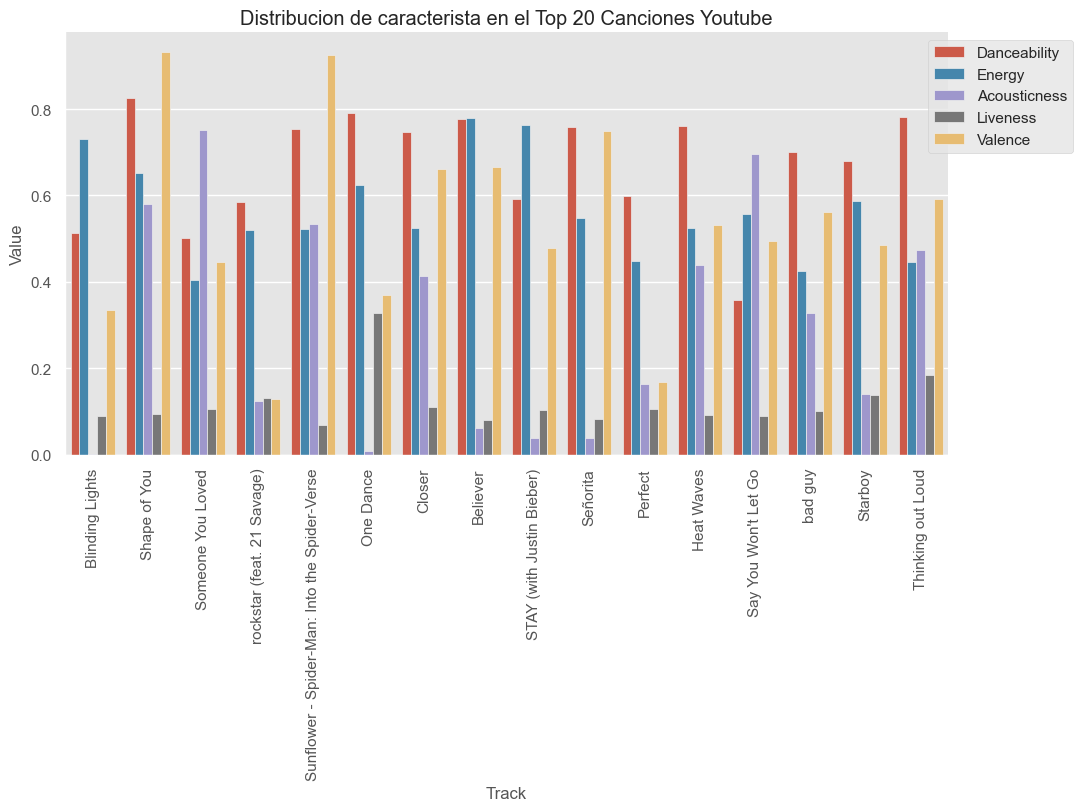

In [553]:
columns_to_catplot =['Danceability', 'Energy', 'Acousticness','Liveness', 'Valence']
top_songs = data.sort_values('Stream', ascending=False).head(20)

top_songs_melt = top_songs.melt(id_vars=['Track'], value_vars= columns_to_catplot ,var_name='Attribute', value_name='Value')

sns.catplot(x='Track', y='Value', hue='Attribute', data=top_songs_melt, kind='bar',aspect=2, legend=False)
plt.legend(loc='upper right', bbox_to_anchor=(1.15, 1))
plt.title('Distribucion de caracterista en el Top 20 Canciones Youtube')
plt.xlabel('Track')
plt.ylabel('Value')
plt.xticks(rotation=90)

In [554]:
columns_to_histplot =['Danceability', 'Energy', 'Acousticness','Liveness', 'Valence','Speechiness']
top_songs = data.sort_values('Stream', ascending=False).head(1000)

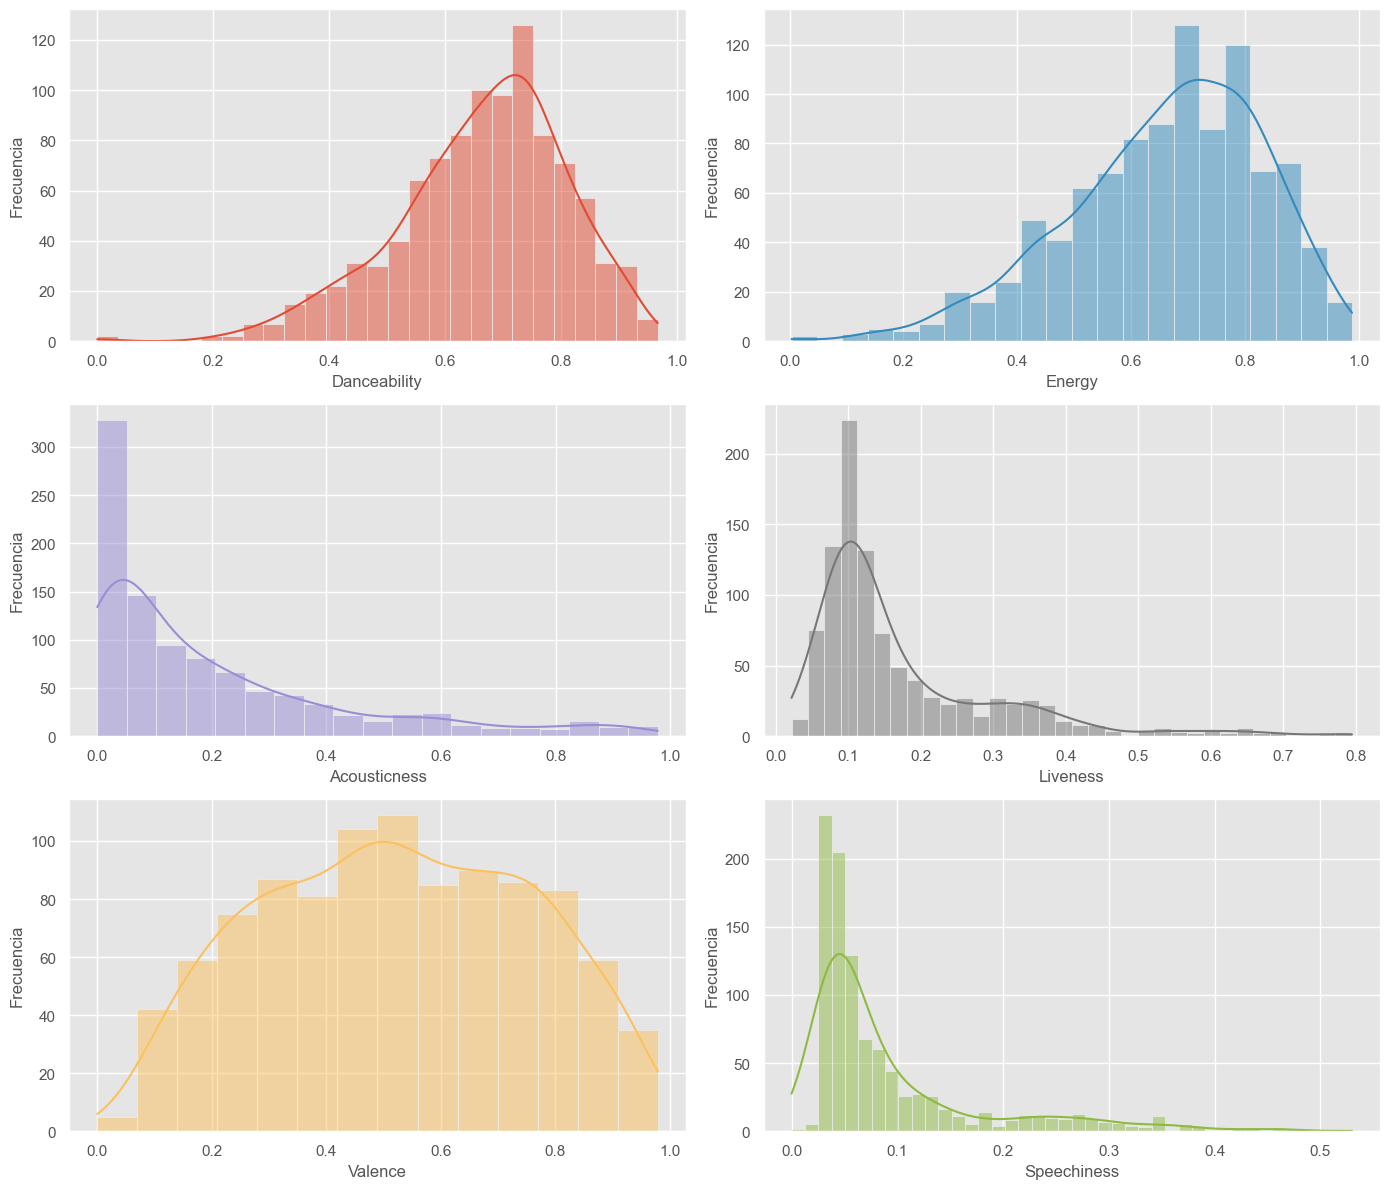

In [555]:
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(14, 12))
for i, feature in enumerate(columns_to_histplot):
    row, col = divmod(i, 2)
    ax = axes[row, col]
    sns.histplot(x=feature, data=top_songs, ax=ax, kde=True, color=sns.color_palette()[i])
    ax.set_xlabel(feature, fontsize=12)
    ax.set_ylabel('Frecuencia', fontsize=12) 
plt.tight_layout()
plt.show()

El análisis de los histogramas de características musicales revela patrones interesantes en las 1000 canciones más exitosas. Se observa una alta frecuencia en los parámetros de Danceability y Energy, lo que sugiere que las canciones que son más bailables y energéticas tienden a ser más populares. Por otro lado, características como Acousticness, Liveness y Speechiness muestran frecuencias más bajas en estos éxitos, indicando que son menos predominantes en las canciones populares. Curiosamente, la Valence se distribuye de manera simétrica, sugiriendo que las canciones exitosas pueden variar ampliamente en su positividad o alegría percibida.

Estos hallazgos apuntan a una especie de 'receta' para el éxito comercial en la música, destacando ciertas características que parecen ser más favorables en las canciones populares. Sin embargo, es importante reconocer que el éxito de una canción no depende exclusivamente de estas características; otros factores como la promoción, la imagen del artista y las tendencias culturales también juegan un papel crucial. A pesar de ello, este análisis ofrece una guía útil sobre las tendencias y preferencias en el panorama musical actual.

#### **Tipos de álbumnes**

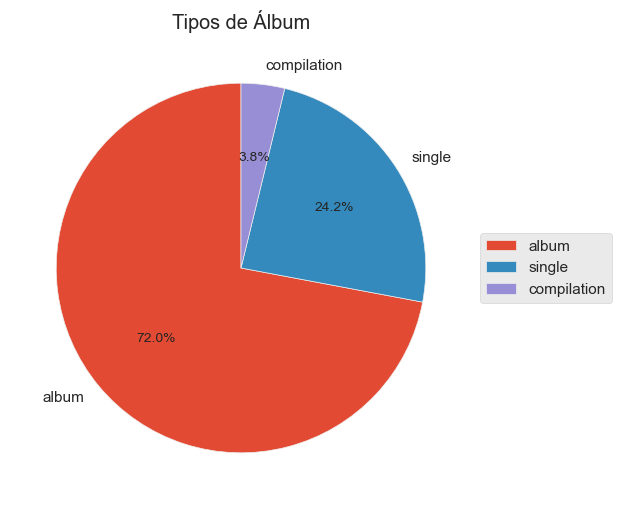

In [556]:
album_type_count = data['Album_type'].value_counts()
plt.figure(figsize=(8, 6))
plt.pie(album_type_count, labels=album_type_count.index, autopct='%1.1f%%', startangle=90)
plt.title("Tipos de Álbum")
plt.legend(labels=album_type_count.index, loc="center left", bbox_to_anchor=(1, 0.5))
plt.show()


In [557]:
data.columns

Index(['Artist', 'Track', 'Album', 'Album_type', 'Danceability', 'Energy',
       'Key', 'Loudness', 'Speechiness', 'Acousticness', 'Instrumentalness',
       'Liveness', 'Valence', 'Tempo', 'Duration_ms', 'Channel', 'Views',
       'Likes', 'Comments', 'Licensed', 'official_video', 'Stream'],
      dtype='object')

#### **TOP 10 Canciones por Likes, Comentarios y Views**

C:\Users\franf\AppData\Local\Temp\ipykernel_12284\1781154162.py:28: UserWarning: Glyph 44053 (\N{HANGUL SYLLABLE GANG}) missing from current font.
  plt.tight_layout()
C:\Users\franf\AppData\Local\Temp\ipykernel_12284\1781154162.py:28: UserWarning: Glyph 45224 (\N{HANGUL SYLLABLE NAM}) missing from current font.
  plt.tight_layout()
C:\Users\franf\AppData\Local\Temp\ipykernel_12284\1781154162.py:28: UserWarning: Glyph 49828 (\N{HANGUL SYLLABLE SEU}) missing from current font.
  plt.tight_layout()
C:\Users\franf\AppData\Local\Temp\ipykernel_12284\1781154162.py:28: UserWarning: Glyph 53440 (\N{HANGUL SYLLABLE TA}) missing from current font.
  plt.tight_layout()
C:\Users\franf\AppData\Local\Temp\ipykernel_12284\1781154162.py:28: UserWarning: Glyph 51068 (\N{HANGUL SYLLABLE IL}) missing from current font.
  plt.tight_layout()
c:\Users\franf\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 44053 (\N{HANGUL SYLLABLE GANG}) missing from current font.
  fig.canvas

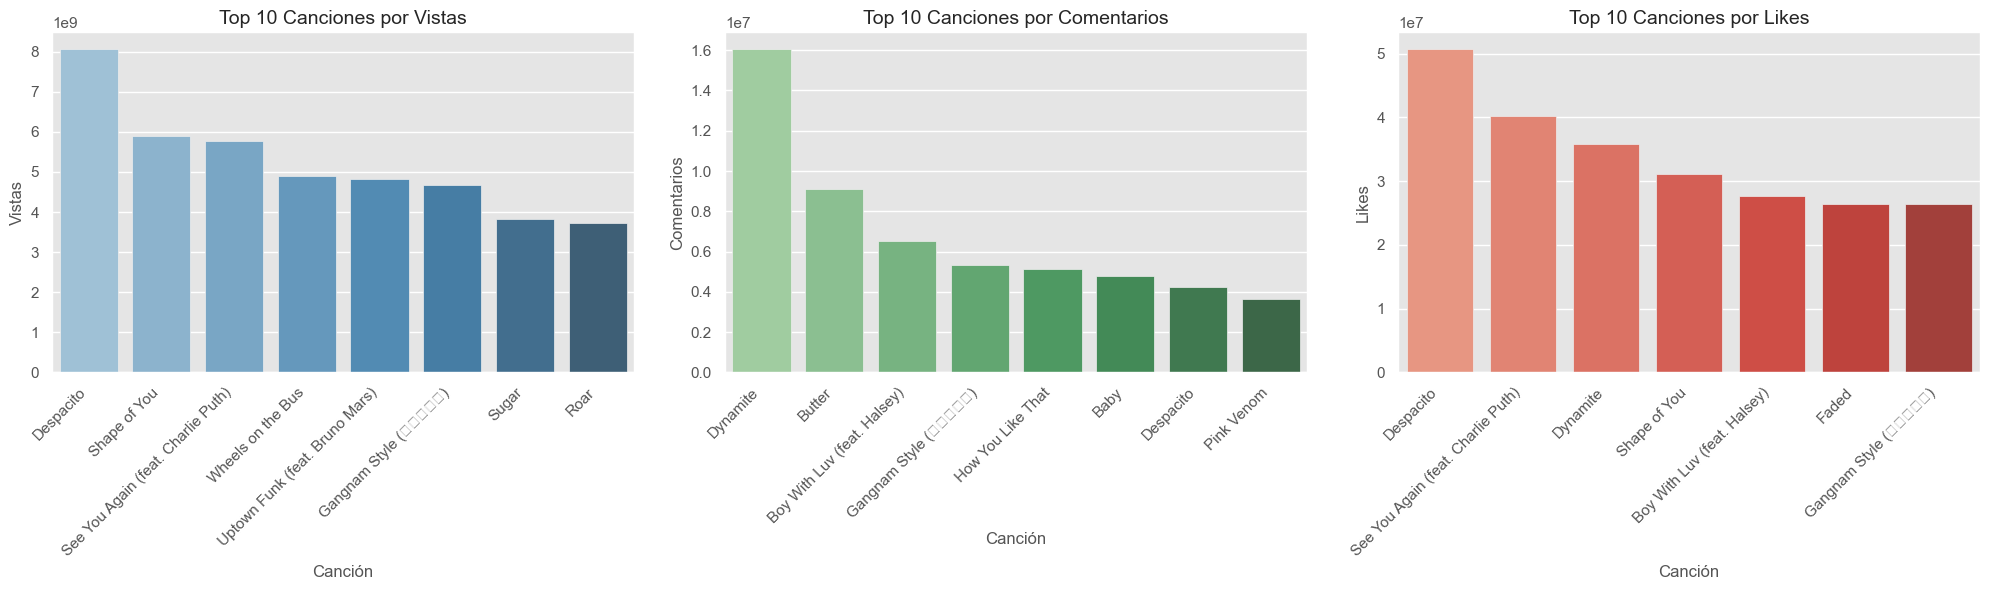

In [558]:
top_view = data.sort_values('Views', ascending=False).head(10)
top_comments = data.sort_values('Comments', ascending=False).head(10)
top_likes = data.sort_values('Likes', ascending=False).head(10)

fig, ax = plt.subplots(1, 3, figsize=(20, 6))
colors_views = sns.color_palette('Blues_d', n_colors=10)
colors_comments = sns.color_palette('Greens_d', n_colors=10)
colors_likes = sns.color_palette('Reds_d', n_colors=10)

sns.barplot(data=top_view, x='Track', y='Views', ax=ax[0], palette=colors_views)
ax[0].set_title('Top 10 Canciones por Vistas', fontsize=14)
ax[0].set_xlabel('Canción', fontsize=12)
ax[0].set_ylabel('Vistas', fontsize=12)
ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation=45, ha="right")

sns.barplot(data=top_comments, x='Track', y='Comments', ax=ax[1], palette=colors_comments)
ax[1].set_title('Top 10 Canciones por Comentarios', fontsize=14)
ax[1].set_xlabel('Canción', fontsize=12)
ax[1].set_ylabel('Comentarios', fontsize=12)
ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation=45, ha="right")

sns.barplot(data=top_likes, x='Track', y='Likes', ax=ax[2], palette=colors_likes)
ax[2].set_title('Top 10 Canciones por Likes', fontsize=14)
ax[2].set_xlabel('Canción', fontsize=12)
ax[2].set_ylabel('Likes', fontsize=12)
ax[2].set_xticklabels(ax[2].get_xticklabels(), rotation=45, ha="right")

plt.tight_layout()
plt.show()


#### **Relación entre la duración y Views**

In [559]:
data['Duration_min'] = (data['Duration_ms']/1000)/60
data = data.drop(columns=['Duration_ms'])

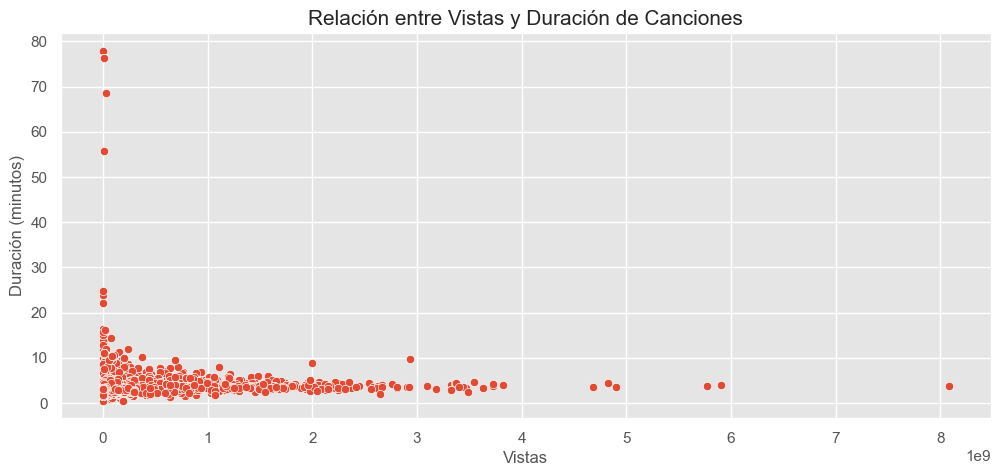

In [560]:

plt.figure(figsize=(12, 5))
scatter_plot = sns.scatterplot(x='Views', y='Duration_min', data=data)
scatter_plot.set_title('Relación entre Vistas y Duración de Canciones', fontsize=15)
scatter_plot.set_xlabel('Vistas', fontsize=12)
scatter_plot.set_ylabel('Duración (minutos)', fontsize=12)
plt.show()

Se puede observar que las canciones entre 2 a 4 tienden a tener un mayor ecito con respectos a las vistas

#### **TOP 10 Artistas**

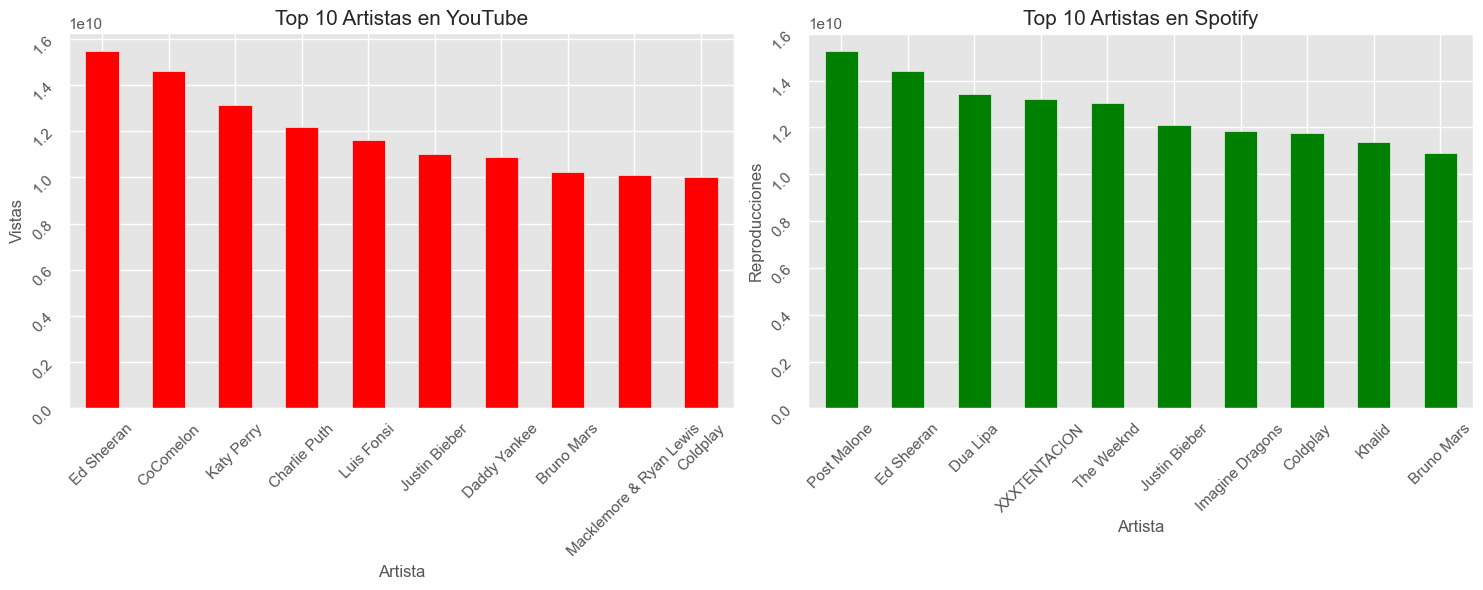

In [561]:
data_views = data.groupby('Artist')['Views'].sum().sort_values(ascending=False)[:10]
data_streams = data.groupby('Artist')['Stream'].sum().sort_values(ascending=False)[:10]
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))
ax1.set_title('Top 10 Artistas en YouTube', fontsize=15)
data_views.plot(kind='bar', ax=ax1, color='red')
ax1.set_xlabel('Artista', fontsize=12)
ax1.set_ylabel('Vistas', fontsize=12)
ax1.tick_params(labelrotation=45)

ax2.set_title('Top 10 Artistas en Spotify', fontsize=15)
data_streams.plot(kind='bar', ax=ax2, color='green')
ax2.set_xlabel('Artista', fontsize=12)
ax2.set_ylabel('Reproducciones', fontsize=12)
ax2.tick_params(labelrotation=45)
fig.tight_layout()
plt.show()

Esto sugiere que las canciones populares en Spotify también tienden a ser populares en YouTube.

In [562]:
label_encoder = LabelEncoder()
data["Album_type"] = label_encoder.fit_transform(data["Album_type"])
data["Licensed"] = label_encoder.fit_transform(data["Licensed"])
data["official_video"] = label_encoder.fit_transform(data["official_video"])
data = data.drop(columns=['Channel','Artist','Album','Track'])
data.head(1)

,Album_type,Danceability,Energy,Key,Loudness,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Views,Likes,Comments,Licensed,official_video,Stream,Duration_min
0,0,0.818,0.705,6.0,-6.679,0.177,0.00836,0.00233,0.613,0.772,138.559,693555221.0,6220896.0,169907.0,1,1,1.040235e+09,3.710667


#### **Relaciones entre Características**

Text(0.5, 1.0, 'Mapa de Calor de Correlación')

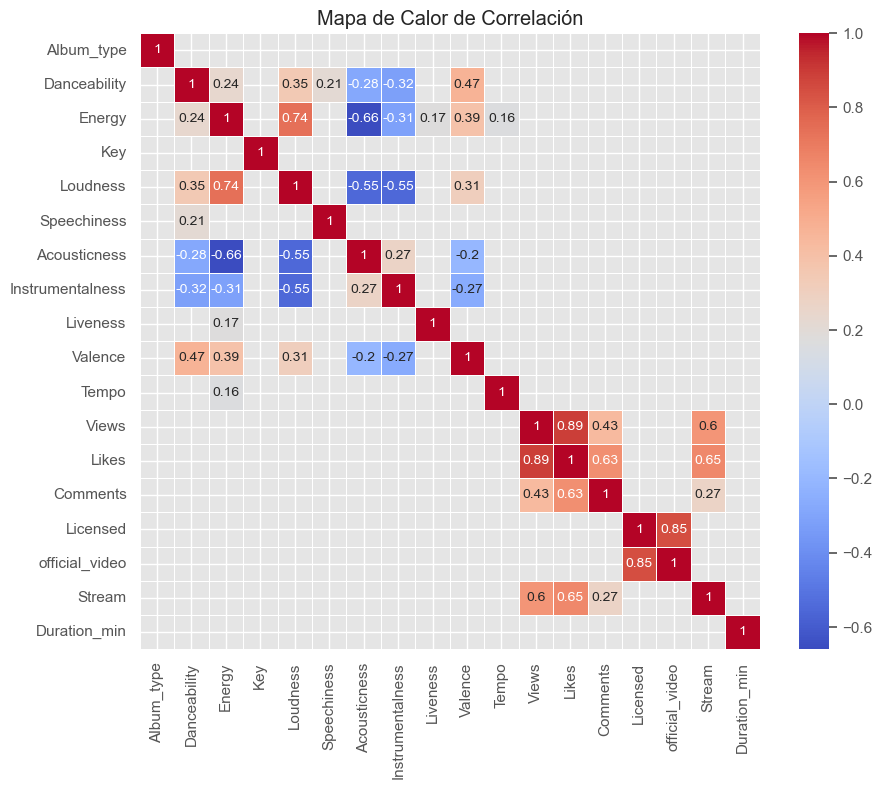

In [563]:
correlation_matrix = data.corr().round(2)
mask = correlation_matrix.abs() <= 0.15
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", linewidths=0.5,mask=mask)
plt.title("Mapa de Calor de Correlación")

- Streams en Spotify y Vistas en YouTube: Al igual que en la grafica anterior.Las canciones populares en Spotify también tienden a ser populares en YouTube.
- Likes en YouTube: Similar a las vistas, los likes en YouTube tienen una correlación moderada con los streams en Spotify (0.65), lo que refuerza la noción de que la popularidad en una plataforma se traslada a la otra.
- Danceability y Valence: Existe una correlación relativamente fuerte (0.47) entre danceability y valence, lo que indica que las canciones más bailables tienden a ser percibidas como más positivas o alegres.
- Energía y Loudness: Hay una correlación fuerte (0.74) entre energía y loudness. Esto no es sorprendente, ya que canciones más enérgicas suelen ser más fuertes.
- Acousticness y Energía:  Existe una correlación negativa entre acousticness y energía, lo que significa que las pistas acústicas tienden a ser menos energéticas.
- Instrumentalness y Danceability: Hay una correlación negativa entre instrumentalness y danceability, lo que podría indicar que las pistas con más contenido vocal son generalmente más bailables.